In [ ]:
cd /content/drive/MyDrive/CNN

/content/drive/MyDrive/CNN


In [ ]:
ls

flowers/  Flowers-Dataset.zip  flowers.h5  Untitled0.ipynb


In [ ]:
pwd

'/content/drive/MyDrive/CNN'

In [ ]:
!unzip Flowers-Dataset.zip

Archive:  Flowers-Dataset.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace flowers/daisy/10140303196_b88d3d6cec.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace flowers/daisy/10172379554_b296050f82_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,horizontal_flip=True, vertical_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
X_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/CNN/flowers",target_size=(64,64),class_mode="categorical",batch_size=32)

Found 4317 images belonging to 5 classes.


In [ ]:
X_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/CNN/flowers",target_size=(64,64),class_mode="categorical",batch_size=32)

Found 4317 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(64,64,3)))

In [ ]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(300,activation="relu"))

In [ ]:
model.add(Dense(300,activation="relu"))

In [ ]:
model.add(Dense(5,activation="softmax"))

In [ ]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer="adam")

In [ ]:
model.fit(X_train,epochs=5,validation_data=X_test,steps_per_epoch=len(X_train),validation_steps=len(X_test))

Epoch 1/5
135/135 [==============================] - 61s 444ms/step - loss: 1.4076 - accuracy: 0.4452 - val_loss: 1.1659 - val_accuracy: 0.4913
Epoch 2/5
135/135 [==============================] - 57s 423ms/step - loss: 1.0612 - accuracy: 0.5738 - val_loss: 0.9883 - val_accuracy: 0.6048
Epoch 3/5
135/135 [==============================] - 57s 423ms/step - loss: 0.9453 - accuracy: 0.6331 - val_loss: 0.8854 - val_accuracy: 0.6650
Epoch 4/5
135/135 [==============================] - 56s 417ms/step - loss: 0.8574 - accuracy: 0.6741 - val_loss: 0.7479 - val_accuracy: 0.7262
Epoch 5/5
135/135 [==============================] - 56s 417ms/step - loss: 0.7802 - accuracy: 0.7033 - val_loss: 0.6583 - val_accuracy: 0.7616


In [ ]:
model.save("flowers.h5")

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
model = load_model("/content/drive/MyDrive/CNN/flowers.h5")

In [ ]:
img = image.load_img("/content/drive/MyDrive/CNN/flowers/daisy/10437770546_8bb6f7bdd3_m.jpg",target_size=(64,64))

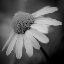

In [ ]:
img

In [ ]:
x = image.img_to_array(img)

In [ ]:
x

array([[[ 66.,  75.,  84.],
        [ 72.,  79.,  89.],
        [ 74.,  81.,  89.],
        ...,
        [115., 136.,  79.],
        [117., 125.,  74.],
        [122., 130.,  81.]],

       [[ 63.,  73.,  82.],
        [ 70.,  80.,  89.],
        [ 73.,  82.,  91.],
        ...,
        [108., 132.,  74.],
        [118., 126.,  75.],
        [121., 118.,  73.]],

       [[ 58.,  67.,  76.],
        [ 70.,  79.,  88.],
        [ 75.,  85.,  94.],
        ...,
        [102., 134.,  71.],
        [109., 129.,  68.],
        [116., 119.,  72.]],

       ...,

       [[ 96., 137.,  79.],
        [ 93., 132.,  75.],
        [ 92., 131.,  74.],
        ...,
        [ 95., 127., 103.],
        [ 84., 112.,  90.],
        [ 65.,  84.,  78.]],

       [[ 95., 136.,  78.],
        [ 91., 130.,  73.],
        [ 89., 128.,  71.],
        ...,
        [ 94., 129.,  99.],
        [ 94., 124.,  98.],
        [ 79.,  97.,  85.]],

       [[ 93., 134.,  76.],
        [ 92., 131.,  74.],
        [ 87., 1

In [ ]:
x.ndim

3

In [ ]:
x = np.expand_dims(x,axis=0)

In [ ]:
x.ndim

4

In [ ]:
pred = model.predict(x)

In [ ]:
pred

array([[1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
labels=("daisy","dandellion","rose","sunflower","tulip")

In [ ]:
np.argmax(pred)

0

In [ ]:
labels[np.argmax(pred)]

'daisy'